# Networks as Nodes and Links: Understanding Network Structure

This notebook demonstrates the fundamental concept of **networks** as systems of connected nodes and links.

Understanding network structure is essential because:
- **Networks represent connected systems** - many business problems involve things that are connected
- **Network structure determines possibilities** - what you can do depends on how things are connected
- **Recognizing network problems** helps you apply the right analytical approach
- **Network thinking applies broadly** - transportation, supply chains, IT, and more all use network principles


## Key Concepts

**Nodes** represent entities in the network:
- Locations, facilities, decision points, or any entity
- Examples: warehouses, stores, servers, people, cities

**Links** (or edges) represent connections:
- Routes, relationships, pathways, or any connection
- Examples: roads, pipelines, data connections, communication channels

**Network Structure** determines what is possible:
- If two nodes are not connected, nothing can flow directly between them
- If they are connected, flow is possible (but may be limited by capacity)
- Understanding structure helps you see constraints and opportunities

**Critical insight**: Networks are everywhere in business. Recognizing that a problem is a network problem helps you think about it more clearly and apply the right analytical tools.


## Scenario: Warehouse Distribution Network

You manage a distribution company with three warehouses and five retail stores. You need to understand which warehouses can serve which stores.

**The Network**:
- **Nodes**: 3 warehouses (W1, W2, W3) and 5 stores (S1, S2, S3, S4, S5)
- **Links**: Transportation routes connecting warehouses to stores
- **Structure**: Not every warehouse can serve every store (geographic and route constraints)

**The Question**: Which warehouses can serve which stores? What paths are available for delivering products?

Understanding the network structure helps you:
- See which delivery routes are possible
- Identify which stores can be served by multiple warehouses (flexibility)
- Recognize bottlenecks or single points of failure


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `networkx` and `matplotlib` packages first. This cell can be skipped if running locally and the packages are already installed.


In [1]:
# Install required packages (needed in Google Colab)
# Can be skipped if already installed locally
%pip install networkx matplotlib -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## Step 3: Create a Simple Network

Let's start with a simple network to understand the basic structure:


In [3]:
# Create a simple directed graph (network)
G = nx.DiGraph()

# Add nodes (warehouses and stores)
warehouses = ['W1', 'W2', 'W3']
stores = ['S1', 'S2', 'S3', 'S4', 'S5']

G.add_nodes_from(warehouses)
G.add_nodes_from(stores)

# Add links (which warehouses can serve which stores)
# W1 can serve S1, S2, S3
# W2 can serve S2, S3, S4
# W3 can serve S3, S4, S5
edges = [
    ('W1', 'S1'), ('W1', 'S2'), ('W1', 'S3'),
    ('W2', 'S2'), ('W2', 'S3'), ('W2', 'S4'),
    ('W3', 'S3'), ('W3', 'S4'), ('W3', 'S5')
]

G.add_edges_from(edges)

print(f"Network has {G.number_of_nodes()} nodes and {G.number_of_edges()} links")
print(f"\nNodes: {list(G.nodes())}")
print(f"Links: {list(G.edges())}")


Network has 8 nodes and 9 links

Nodes: ['W1', 'W2', 'W3', 'S1', 'S2', 'S3', 'S4', 'S5']
Links: [('W1', 'S1'), ('W1', 'S2'), ('W1', 'S3'), ('W2', 'S2'), ('W2', 'S3'), ('W2', 'S4'), ('W3', 'S3'), ('W3', 'S4'), ('W3', 'S5')]


## Step 4: Visualize the Network Structure

Visualizing the network helps you see the structure clearly:


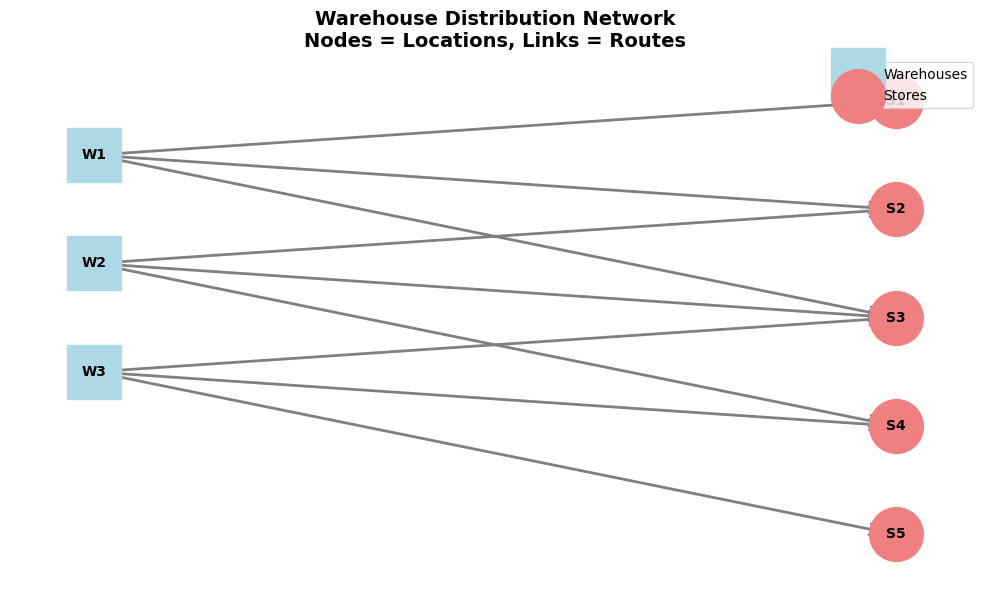


Key Observations:
  • S3 can be served by all three warehouses (most flexible)
  • S1 can only be served by W1 (single point of failure)
  • S5 can only be served by W3 (single point of failure)
  • Network structure determines delivery options


In [4]:
# Create a layout for the network
pos = {
    'W1': (0, 2), 'W2': (0, 1), 'W3': (0, 0),
    'S1': (2, 2.5), 'S2': (2, 1.5), 'S3': (2, 0.5), 'S4': (2, -0.5), 'S5': (2, -1.5)
}

# Draw the network
plt.figure(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=warehouses, node_color='lightblue', 
                        node_size=1500, node_shape='s', label='Warehouses')
nx.draw_networkx_nodes(G, pos, nodelist=stores, node_color='lightcoral', 
                        node_size=1500, node_shape='o', label='Stores')

# Draw edges (links)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, 
                       arrowsize=20, arrowstyle='->', width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Warehouse Distribution Network\nNodes = Locations, Links = Routes', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("  • S3 can be served by all three warehouses (most flexible)")
print("  • S1 can only be served by W1 (single point of failure)")
print("  • S5 can only be served by W3 (single point of failure)")
print("  • Network structure determines delivery options")


## Step 5: Analyze Network Structure

Let's analyze which stores can be reached from which warehouses:


In [5]:
# Analyze reachability: which stores can each warehouse serve?
print("NETWORK STRUCTURE ANALYSIS")
print("=" * 50)

for warehouse in warehouses:
    # Find all stores reachable from this warehouse
    reachable = list(nx.descendants(G, warehouse))
    print(f"\n{warehouse} can serve: {reachable}")
    print(f"  Number of stores: {len(reachable)}")

print("\n" + "=" * 50)
print("STORE FLEXIBILITY ANALYSIS")
print("=" * 50)

for store in stores:
    # Find all warehouses that can serve this store
    predecessors = list(G.predecessors(store))
    print(f"\n{store} can be served by: {predecessors}")
    if len(predecessors) > 1:
        print(f"  ✓ Flexible: {len(predecessors)} options")
    else:
        print(f"  ⚠ Single point of failure: only {predecessors[0]}")


NETWORK STRUCTURE ANALYSIS

W1 can serve: ['S3', 'S2', 'S1']
  Number of stores: 3

W2 can serve: ['S3', 'S4', 'S2']
  Number of stores: 3

W3 can serve: ['S3', 'S4', 'S5']
  Number of stores: 3

STORE FLEXIBILITY ANALYSIS

S1 can be served by: ['W1']
  ⚠ Single point of failure: only W1

S2 can be served by: ['W1', 'W2']
  ✓ Flexible: 2 options

S3 can be served by: ['W1', 'W2', 'W3']
  ✓ Flexible: 3 options

S4 can be served by: ['W2', 'W3']
  ✓ Flexible: 2 options

S5 can be served by: ['W3']
  ⚠ Single point of failure: only W3


## Step 6: Networks Beyond Transportation

Networks appear in many business contexts, not just transportation. Let's see examples:


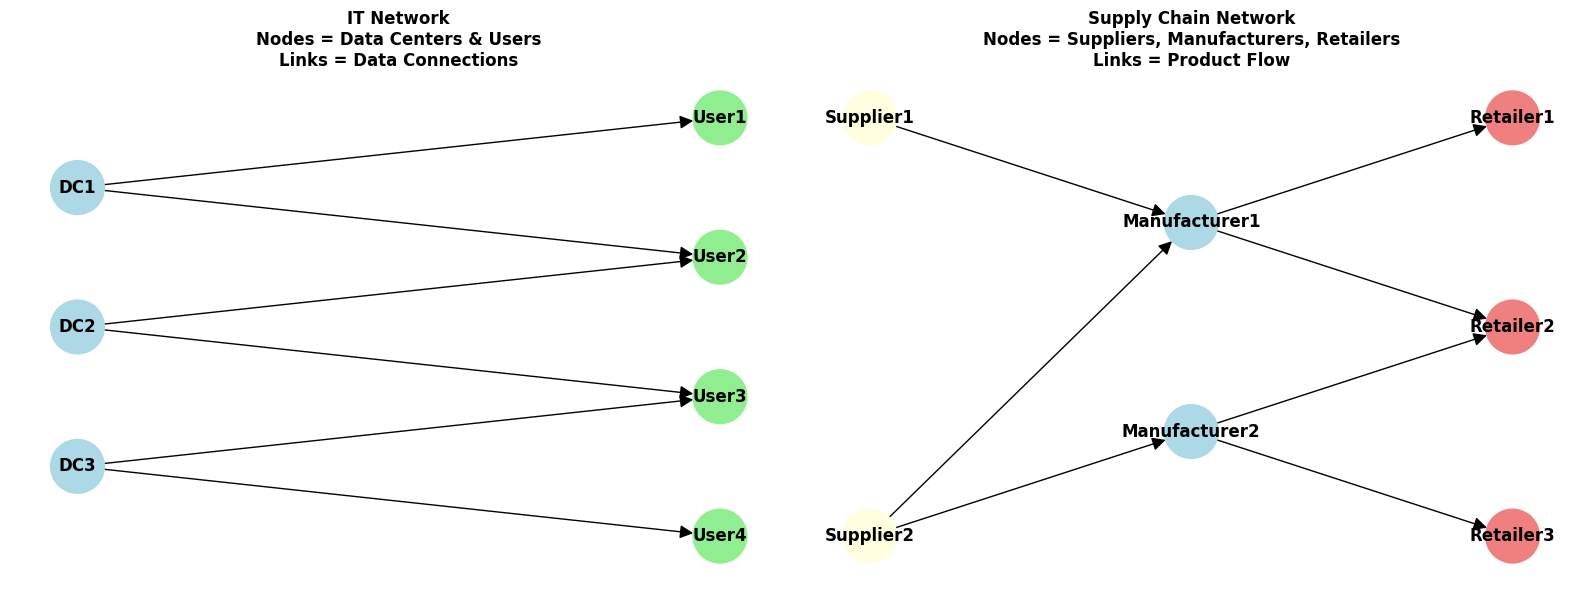


Key Insight: The same network principles apply regardless of what flows!
  • IT networks: data flows through connections
  • Supply chains: products flow through connections
  • Transportation: goods flow through connections
  • All use nodes, links, and structure determines possibilities


In [6]:
# Example 1: IT Network (Data Centers and Users)
it_network = nx.DiGraph()
it_network.add_nodes_from(['DC1', 'DC2', 'DC3'], node_type='datacenter')
it_network.add_nodes_from(['User1', 'User2', 'User3', 'User4'], node_type='user')
it_network.add_edges_from([
    ('DC1', 'User1'), ('DC1', 'User2'),
    ('DC2', 'User2'), ('DC2', 'User3'),
    ('DC3', 'User3'), ('DC3', 'User4')
])

# Example 2: Supply Chain Network (Suppliers to Retailers)
supply_chain = nx.DiGraph()
supply_chain.add_nodes_from(['Supplier1', 'Supplier2'], node_type='supplier')
supply_chain.add_nodes_from(['Manufacturer1', 'Manufacturer2'], node_type='manufacturer')
supply_chain.add_nodes_from(['Retailer1', 'Retailer2', 'Retailer3'], node_type='retailer')
supply_chain.add_edges_from([
    ('Supplier1', 'Manufacturer1'), ('Supplier2', 'Manufacturer1'),
    ('Supplier2', 'Manufacturer2'),
    ('Manufacturer1', 'Retailer1'), ('Manufacturer1', 'Retailer2'),
    ('Manufacturer2', 'Retailer2'), ('Manufacturer2', 'Retailer3')
])

# Visualize both networks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# IT Network
pos_it = {
    'DC1': (0, 1), 'DC2': (0, 0), 'DC3': (0, -1),
    'User1': (2, 1.5), 'User2': (2, 0.5), 'User3': (2, -0.5), 'User4': (2, -1.5)
}
nx.draw(it_network, pos_it, ax=ax1, with_labels=True, 
        node_color=['lightblue', 'lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen'],
        node_size=1500, arrows=True, arrowsize=20, font_weight='bold')
ax1.set_title('IT Network\nNodes = Data Centers & Users\nLinks = Data Connections', fontweight='bold')

# Supply Chain Network
pos_sc = {
    'Supplier1': (0, 1), 'Supplier2': (0, 0),
    'Manufacturer1': (1.5, 0.75), 'Manufacturer2': (1.5, 0.25),
    'Retailer1': (3, 1), 'Retailer2': (3, 0.5), 'Retailer3': (3, 0)
}
nx.draw(supply_chain, pos_sc, ax=ax2, with_labels=True,
        node_color=['lightyellow', 'lightyellow', 'lightblue', 'lightblue', 'lightcoral', 'lightcoral', 'lightcoral'],
        node_size=1500, arrows=True, arrowsize=20, font_weight='bold')
ax2.set_title('Supply Chain Network\nNodes = Suppliers, Manufacturers, Retailers\nLinks = Product Flow', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insight: The same network principles apply regardless of what flows!")
print("  • IT networks: data flows through connections")
print("  • Supply chains: products flow through connections")
print("  • Transportation: goods flow through connections")
print("  • All use nodes, links, and structure determines possibilities")


## Step 7: How Structure Determines Possibilities

The network structure determines what is possible. Let's see what happens when structure changes:


SCENARIO: Link W1 → S1 is removed (road closed, connection down, etc.)

⚠️  PROBLEM: S1 is now unreachable!
   No warehouse can serve S1 anymore.
   This is a critical vulnerability.


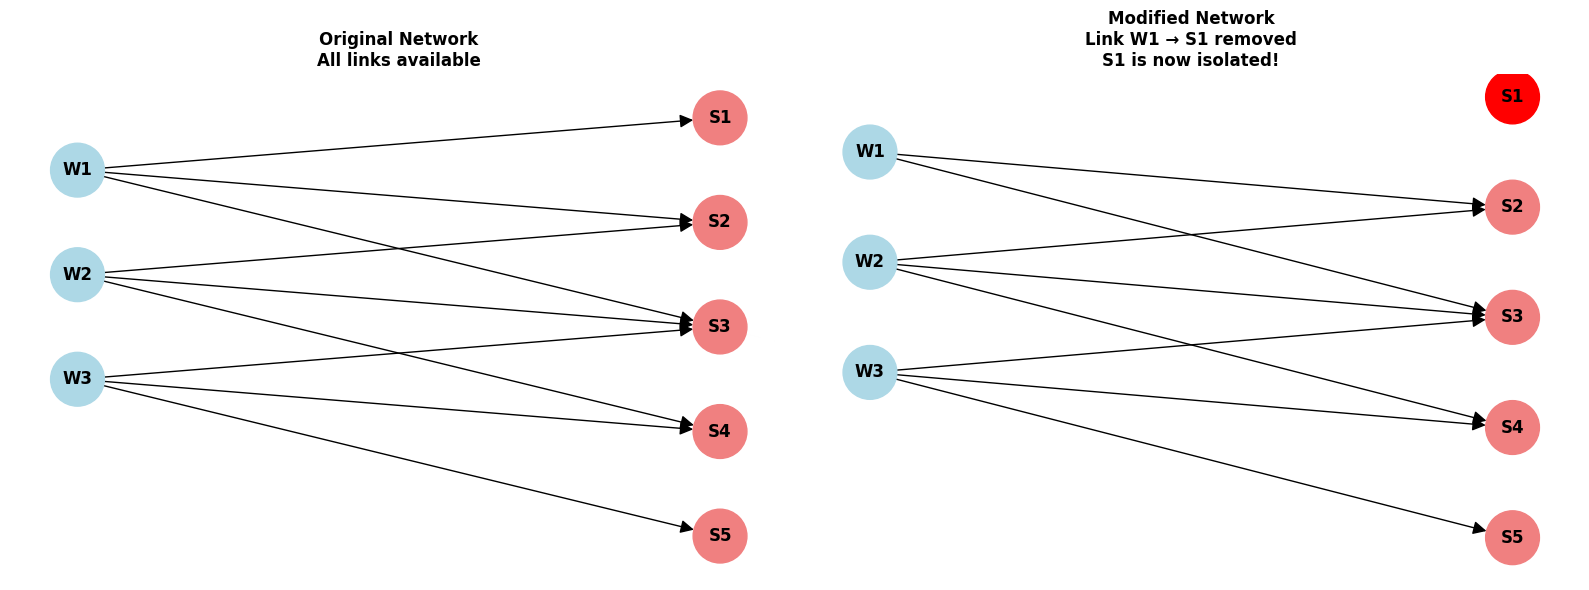


Key Insight: Network structure determines what is possible.
  • If a critical link fails, some nodes become unreachable
  • Understanding structure helps you identify vulnerabilities
  • Alternative paths provide resilience


In [7]:
# Scenario: What if a link is removed?
G_modified = G.copy()
G_modified.remove_edge('W1', 'S1')

print("SCENARIO: Link W1 → S1 is removed (road closed, connection down, etc.)")
print("=" * 60)

# Check if S1 is still reachable
s1_reachable = list(G_modified.predecessors('S1'))

if len(s1_reachable) == 0:
    print("\n⚠️  PROBLEM: S1 is now unreachable!")
    print("   No warehouse can serve S1 anymore.")
    print("   This is a critical vulnerability.")
else:
    print(f"\n✓ S1 can still be served by: {s1_reachable}")

# Visualize the change
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original network
nx.draw(G, pos, ax=ax1, with_labels=True, 
        node_color=['lightblue', 'lightblue', 'lightblue', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral'],
        node_size=1500, arrows=True, arrowsize=20, font_weight='bold')
ax1.set_title('Original Network\nAll links available', fontweight='bold', fontsize=12)

# Modified network
nx.draw(G_modified, pos, ax=ax2, with_labels=True,
        node_color=['lightblue', 'lightblue', 'lightblue', 'red', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral'],
        node_size=1500, arrows=True, arrowsize=20, font_weight='bold')
ax2.set_title('Modified Network\nLink W1 → S1 removed\nS1 is now isolated!', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\nKey Insight: Network structure determines what is possible.")
print("  • If a critical link fails, some nodes become unreachable")
print("  • Understanding structure helps you identify vulnerabilities")
print("  • Alternative paths provide resilience")


## Step 8: Key Takeaways

**Networks are everywhere in business**:
- Transportation, supply chains, IT, communication, and more
- All use the same principles: nodes, links, and structure

**Network structure determines possibilities**:
- If nodes aren't connected, nothing can flow between them
- Understanding structure helps you see constraints and opportunities

**Recognizing network problems helps you**:
- Apply the right analytical approach
- Identify vulnerabilities and bottlenecks
- Make better routing and allocation decisions

**Next steps**: Once you understand network structure, you can think about flow (how much moves through the network) and capacity (what limits the flow).
